### Reversing training data to understand ML models

Need a function to take a sample from Xtrain $x$ and display it in a reasonable manner.

1. Generate empty holds  $E\in \mathbf{Z}^{242}$

2. Iterate through $x \in \mathbf{Z}^{164}$ adding in $0$ if $E_i = 1$ by convering $x$ to a list then back to array. $x\in \mathbf{Z}^{242}$ now

3. Reshape $x\in \mathbf{Z}^{22\times 11}$

4. Split $x$ into start middle and end arrays and reshare each one to be $\in \mathbf{Z}^{18\times11}$

5. Display using Matplotlib by summing all 3 arrays.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


training_data = np.load('2016TrainingData.npy',allow_pickle=True)
data2016 = pd.read_json("raw/moonboard_problems_setup_2016.json")

data2016 = data2016.transpose()

def convert_key(key):
    '''
    Converts desciption (e.g B10) into a row and column index
    for a 18x11 array
    '''
    letter = key[0]
    number = key[1:]
    
    col = ord(letter) - 65
    row = 18-int(number)

    return row,col

def convert_moves(moves):
    '''
    Converts the list of dictionarys from the moves column into
    3 18x11 arrays for start/middle/end holds
    '''
    holds = np.zeros((3,18,11),dtype=bool)

    
    for dic in moves:
        key = dic['Description']
        
        row,col = convert_key(key)
        if dic['IsStart']:
            holds[0,row,col] = True
        elif dic['IsEnd']:
            holds[2,row,col] = True
        else:
            holds[1,row,col] = True
            
    return holds


data2016["Moves"] = data2016["Moves"].apply(convert_moves)



In [2]:
# Step 1
def convert_key(key):
    '''
    Converts desciption (e.g B10) into a row and column index
    for a 18x11 array
    '''
    letter = key[0]
    number = key[1:]
    
    col = ord(letter) - 65
    row = 18-int(number)

    return row,col

def condense(moves):
    '''
    function to remove empty rows of the dataset
    '''
    new_moves = np.zeros((22,11))
    
    new_moves[0:5,:] = moves[0][12:17,:]
    new_moves[5:21,:] = moves[1][1:17,:]
    new_moves[-1,:] = moves[2][0,:]
    
    return new_moves

empty_holds = ["F18",
              "J18",
              "A17","B17","C17","E17","F17","H17","I17","J17","K17",
              "J15","K15",
              "B14",
              "A8",
              "A7",
              "A6","H6",
              "B5","E5","G5",
              "A4","C4","D4","E4","F4","H4","J4","K4",
              "A3","C3","E3","F3","G3","H3","I3","J3","K3",
              "A2","B2","C2","D2","E2","F2","H2","I2","K2",
              "A1","B1","C1","D1","E1","F1","G1","H1","I1","J1","K1",]

null_moves = np.zeros((3,18,11)) #creates empty route to highlight null holds

for hold in empty_holds:
    row,col = convert_key(hold)
    
    null_moves[0][row,col] = 1
    null_moves[1][row,col] = 1
    null_moves[2][row,col] = 1
    
null_moves = condense(null_moves)
null_moves = null_moves.flatten()

null_moves.shape

(242,)

In [3]:
#step 2

x = training_data[0]

x = list(x[1])

print(len(x))

inserted = 0
for i,k in enumerate(null_moves):
    if k == 1:
        x.insert(i+inserted,0)
        
        inserted += 1
        
print(len(x))

#step 3

x = np.array(x)

x = x.reshape((22,11))

# step 4

s = np.zeros((18,11))
m = np.zeros((18,11))
e = np.zeros((18,11))

s[12:17,:] = x[0:5,:]
m[1:17,:] = x[5:21,:]
e[0,:] = x[-1,:]

x = np.array([s,m,e])

164
242


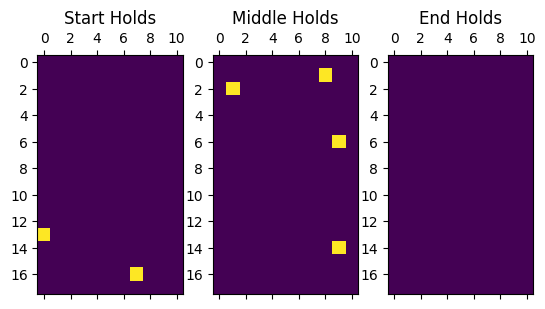

In [4]:
#step 5

figure, axis = plt.subplots(1,3)

axis[0].matshow(x[0])
axis[0].set_title('Start Holds')
axis[1].matshow(x[1])
axis[1].set_title('Middle Holds')
axis[2].matshow(x[2])
axis[2].set_title('End Holds')

plt.show()

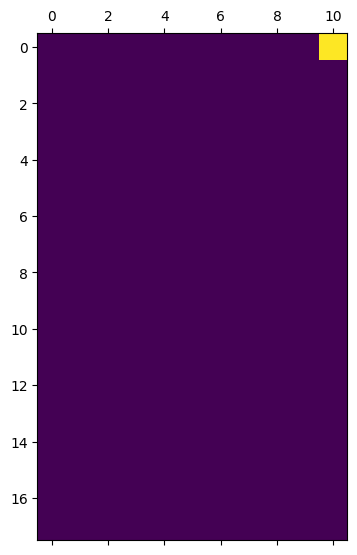

In [23]:
plt.matshow(data2016.iloc[0]["Moves"][2])

In [10]:
data2016.iloc[0]['Moves'][0]

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, Fal